In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import shap
%matplotlib inline

## Question 1

In [4]:
df = pd.read_csv('Life Expectancy Data.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


Check for skewness

In [5]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns #Get Numerical Columns
num_cols

Index(['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [6]:
df[num_cols].skew() #Check for skewness

Year                               -0.006409
Life expectancy                    -0.638605
Adult Mortality                     1.174369
infant deaths                       9.786963
Alcohol                             0.589563
percentage expenditure              4.652051
Hepatitis B                        -1.930845
Measles                             9.441332
 BMI                               -0.219312
under-five deaths                   9.495065
Polio                              -2.098053
Total expenditure                   0.618686
Diphtheria                         -2.072753
 HIV/AIDS                           5.396112
GDP                                 3.206655
Population                         15.916236
 thinness  1-19 years               1.711471
 thinness 5-9 years                 1.777424
Income composition of resources    -1.143763
Schooling                          -0.602437
dtype: float64

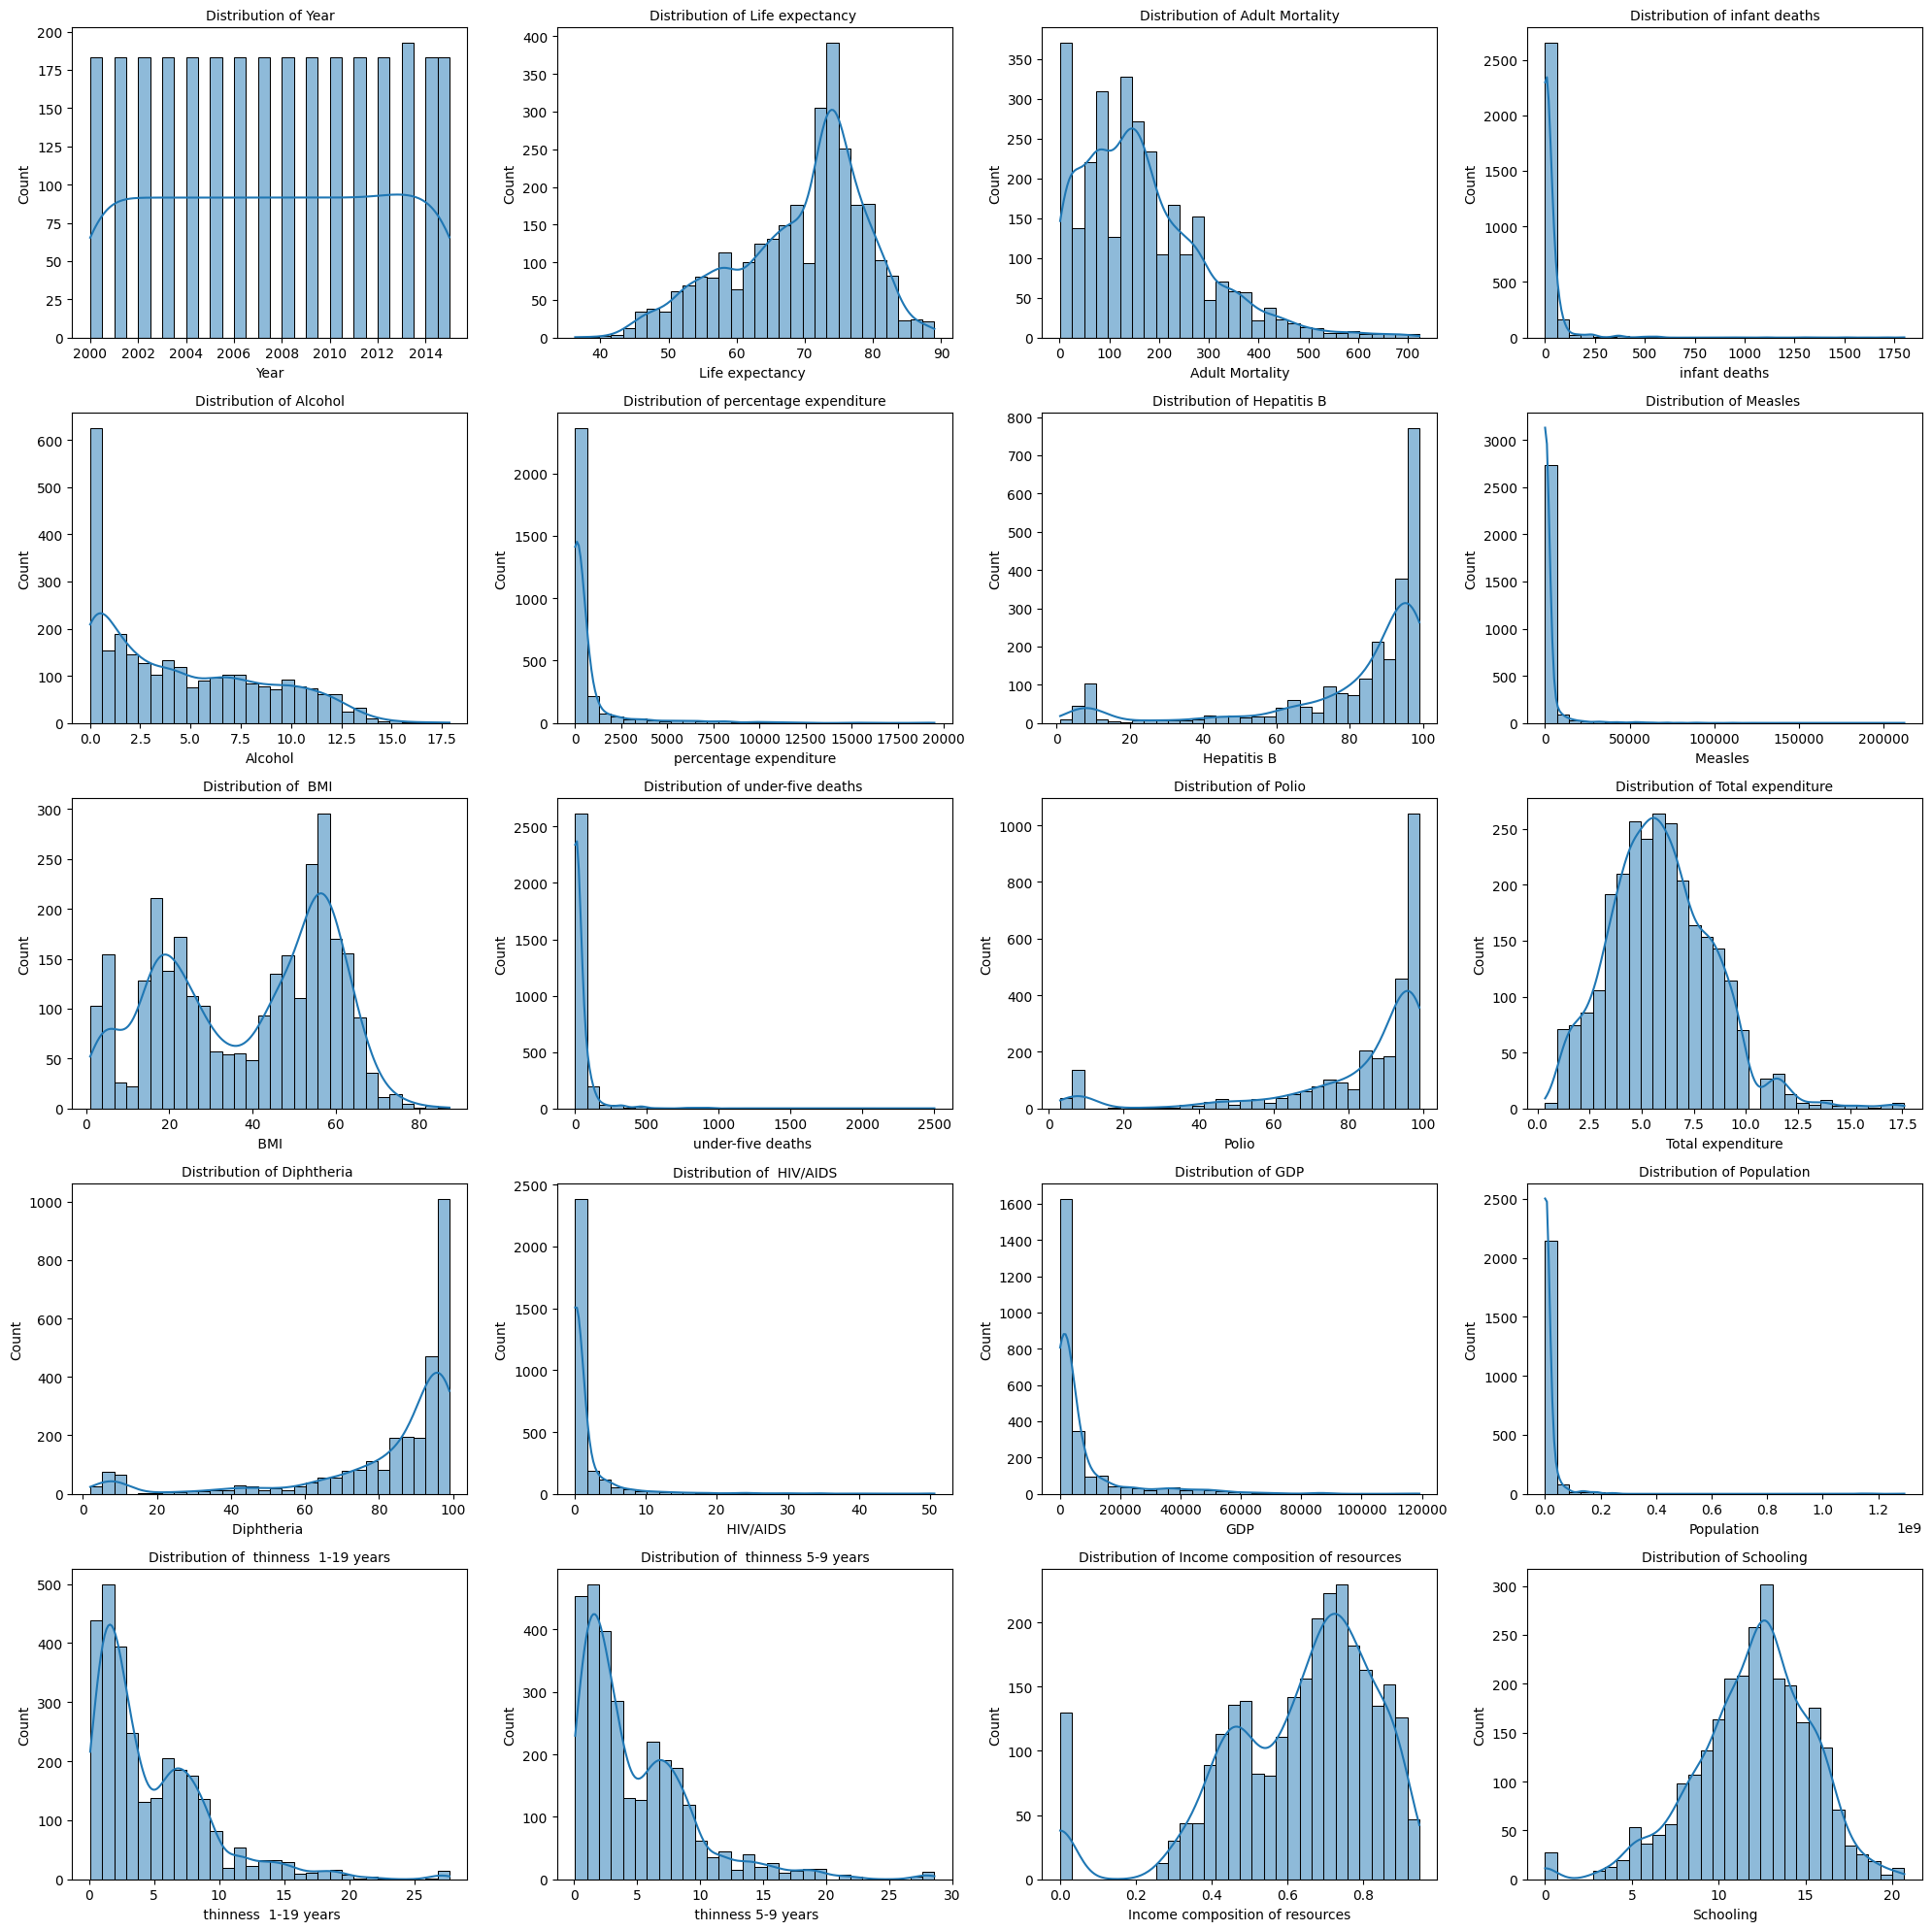

In [7]:
n = len(num_cols) #Number of numerical columns
cols = 4         #Number of columns for the subplots               
rows = math.ceil(n / cols)    #Number of rows for the subplots

plt.figure(figsize=(20, rows * 4))

# Plot histograms for each numerical column
for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f"Distribution of {col}", fontsize=10)

plt.tight_layout()
plt.show()

In [8]:
df.describe() #Statistical Summary for all numerical columns

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


Check The Data Types

In [9]:
print(df.dtypes)

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object


In [10]:
df.select_dtypes(include=['object', 'category']).columns #Get Categorical Columns

Index(['Country', 'Status'], dtype='object')

In [11]:
sorted(df['Status'].unique()) #Unique values in 'Status' column

['Developed', 'Developing']

In [12]:
print("Number of Countries: ",len(df['Country'].unique())) #Number of unique countries in the dataset

Number of Countries:  193


In [13]:
print(df.columns.tolist())

['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']


In [14]:
df.columns = df.columns.str.strip()

# Now group and calculate the average life expectancy
life_expectancy_avg = df.groupby(['Status', 'Year'])['Life expectancy'].mean().reset_index()

life_expectancy_avg

,Status,Year,Life expectancy
0,Developed,2000,76.803125
1,Developed,2001,77.128125
2,Developed,2002,77.546875
3,Developed,2003,77.940625
4,Developed,2004,78.384375
5,Developed,2005,78.590625
6,Developed,2006,79.131250
7,Developed,2007,79.300000
8,Developed,2008,78.931250
9,Developed,2009,79.584375


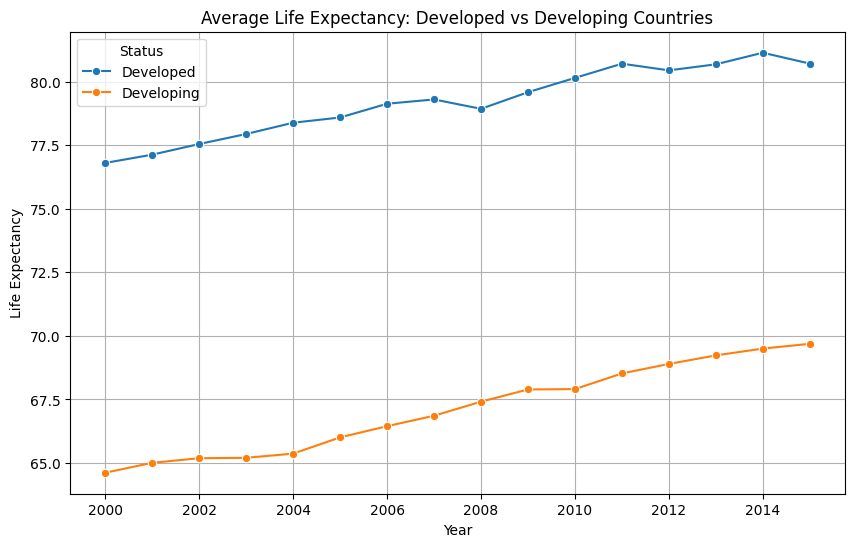

In [15]:
plt.figure(figsize=(10,6))
sns.lineplot(data=life_expectancy_avg, x='Year', y='Life expectancy', hue='Status', marker='o')
plt.title('Average Life Expectancy: Developed vs Developing Countries')
plt.ylabel('Life Expectancy')
plt.grid(True)
plt.show()

## Question 2

In [16]:
missing_values = df.isna().sum() #Check for missing values in each column
missing_values

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [17]:
all_values = df.shape[0] #Total number of rows
missing_percentage = (missing_values / all_values) * 100 #Calculate missing data percentage
print('Missing Data Percentage per Column:') 
missing_percentage

Missing Data Percentage per Column:


Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
BMI                                 1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
HIV/AIDS                            0.000000
GDP                                15.248468
Population                         22.191967
thinness  1-19 years                1.157250
thinness 5-9 years                  1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: flo

In [18]:
country_medians = df.groupby('Country')['Population'].median()

# Map back to rows
df['Population_country_median'] = df['Country'].map(country_medians)

# Fill missing values in Population using each country's median
df['Population_country_median'] = df.apply(
    lambda row: row['Population_country_median'] if pd.isna(row['Population']) 
                else row['Population'],
    axis=1
)

temp = df[['Population']].copy() #Create temporary dataframe for imputation

imputer = KNNImputer(n_neighbors=5) #Create KNN imputer

temp_imputed = imputer.fit_transform(temp) #Fit and transform the data

df['Population_knn'] = temp_imputed[:, 0]

In [19]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns #Get Numeric Columns

# Create KNN imputer
imputer = KNNImputer(n_neighbors=5)

# Fit + transform numeric columns
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

In [20]:
# Compare statistics before and after imputation
comparison_stats = pd.DataFrame({
    'Original Population': [
        df['Population'].mean(),
        df['Population'].std()
    ],
    'Country Median Imputation': [
        df['Population_country_median'].mean(),
        df['Population_country_median'].std()
    ],
    'KNN Imputation': [
        df['Population_knn'].mean(),
        df['Population_knn'].std()
    ]
}, index=['Mean', 'Standard Deviation'])

comparison_stats

,Original Population,Country Median Imputation,KNN Imputation
Mean,1.275329e+07,1.084211e+07,1.275338e+07
Standard Deviation,5.381583e+07,5.393448e+07,5.381546e+07


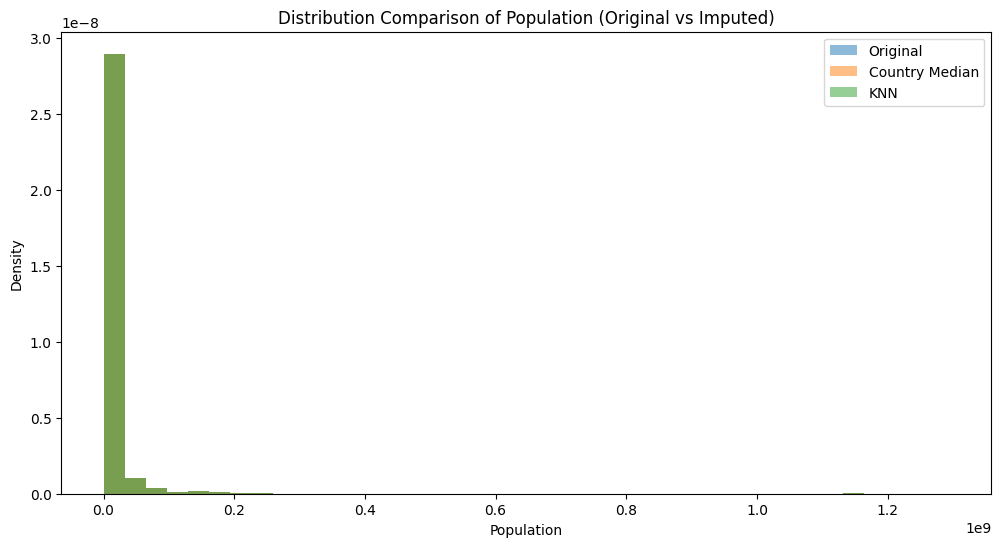

In [21]:
plt.figure(figsize=(12, 6))

# plot distribution comparison of population column before and after handling missing data
plt.hist(df['Population'], bins=40, alpha=0.5, label='Original', density=True)
plt.hist(df['Population_country_median'], bins=40, alpha=0.5, label='Country Median', density=True)
plt.hist(df['Population_knn'], bins=40, alpha=0.5, label='KNN', density=True)

plt.title('Distribution Comparison of Population (Original vs Imputed)')
plt.xlabel('Population')
plt.ylabel('Density')
plt.legend()
plt.show()

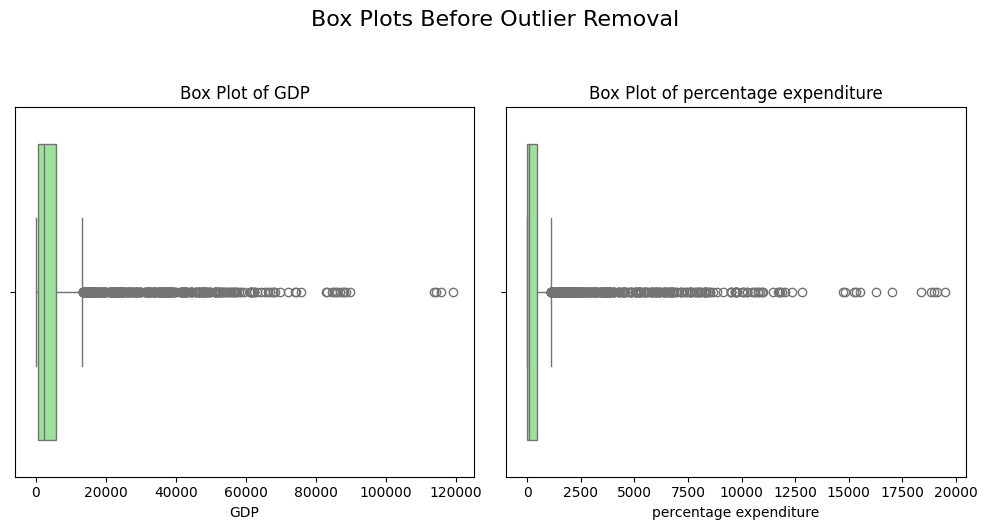

In [22]:
cols_to_plot = ['GDP', 'percentage expenditure'] #Columns to plot box plots for

plt.figure(figsize=(10, 5))

plt.suptitle("Box Plots Before Outlier Removal", fontsize=16, y=1.05)

# Plot box plots for GDP and percentage expenditure
for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f"Box Plot of {col}", fontsize=12)
    plt.xlabel(col)

plt.tight_layout()
plt.show()

In [23]:
df_clean = df.copy()
for col in ['GDP', 'percentage expenditure']:  # your two columns
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]

df = df_clean

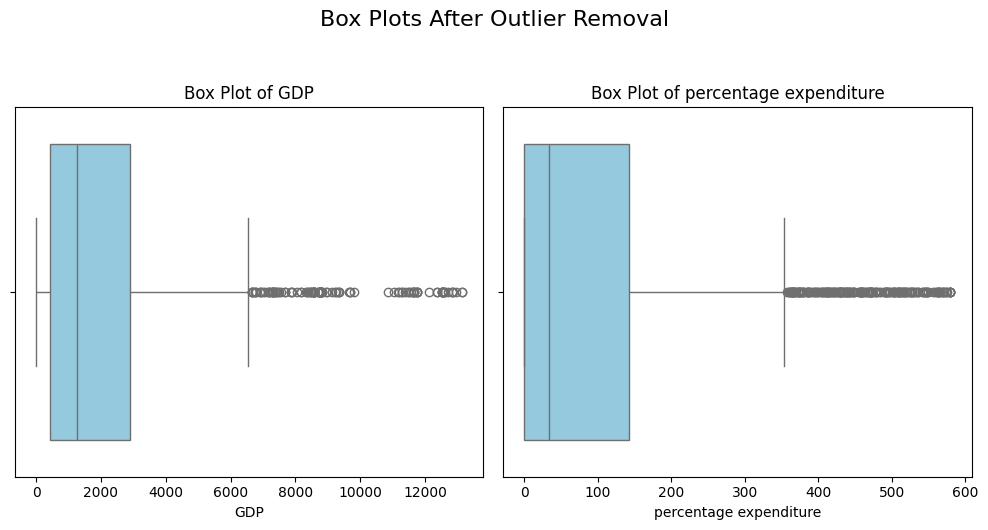

In [24]:
plt.figure(figsize=(10, 5))

plt.suptitle("Box Plots After Outlier Removal", fontsize=16, y=1.05)

# Plot box plots for GDP and percentage expenditure after outlier removal
for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f"Box Plot of {col}", fontsize=12)
    plt.xlabel(col)

plt.tight_layout()
plt.show()

## Question 3

**creating new features**

In [25]:
df['infant survival rate'] = 1 - (df['infant deaths']/1000)
df['Vaccination Coverage Index'] = (df['Hepatitis B'] + df['Polio'] + df['Diphtheria']) / 3
df['Education Income Index'] = df['Schooling'] * df['Income composition of resources']
df['Health Spending per Capita'] = df['percentage expenditure']/ df['Population']

df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Population_country_median,Population_knn,infant survival rate,Vaccination Coverage Index,Education Income Index,Health Spending per Capita
0,Afghanistan,2015.0,Developing,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,...,17.2,17.3,0.479,10.1,33736494.0,33736494.0,0.938,45.333333,4.8379,0.000002
1,Afghanistan,2014.0,Developing,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,...,17.5,17.5,0.476,10.0,327582.0,327582.0,0.936,60.666667,4.7600,0.000224
2,Afghanistan,2013.0,Developing,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,...,17.7,17.7,0.470,9.9,31731688.0,31731688.0,0.934,63.333333,4.6530,0.000002
3,Afghanistan,2012.0,Developing,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,...,17.9,18.0,0.463,9.8,3696958.0,3696958.0,0.931,67.000000,4.5374,0.000021
4,Afghanistan,2011.0,Developing,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,...,18.2,18.2,0.454,9.5,2978599.0,2978599.0,0.929,68.000000,4.3130,0.000002


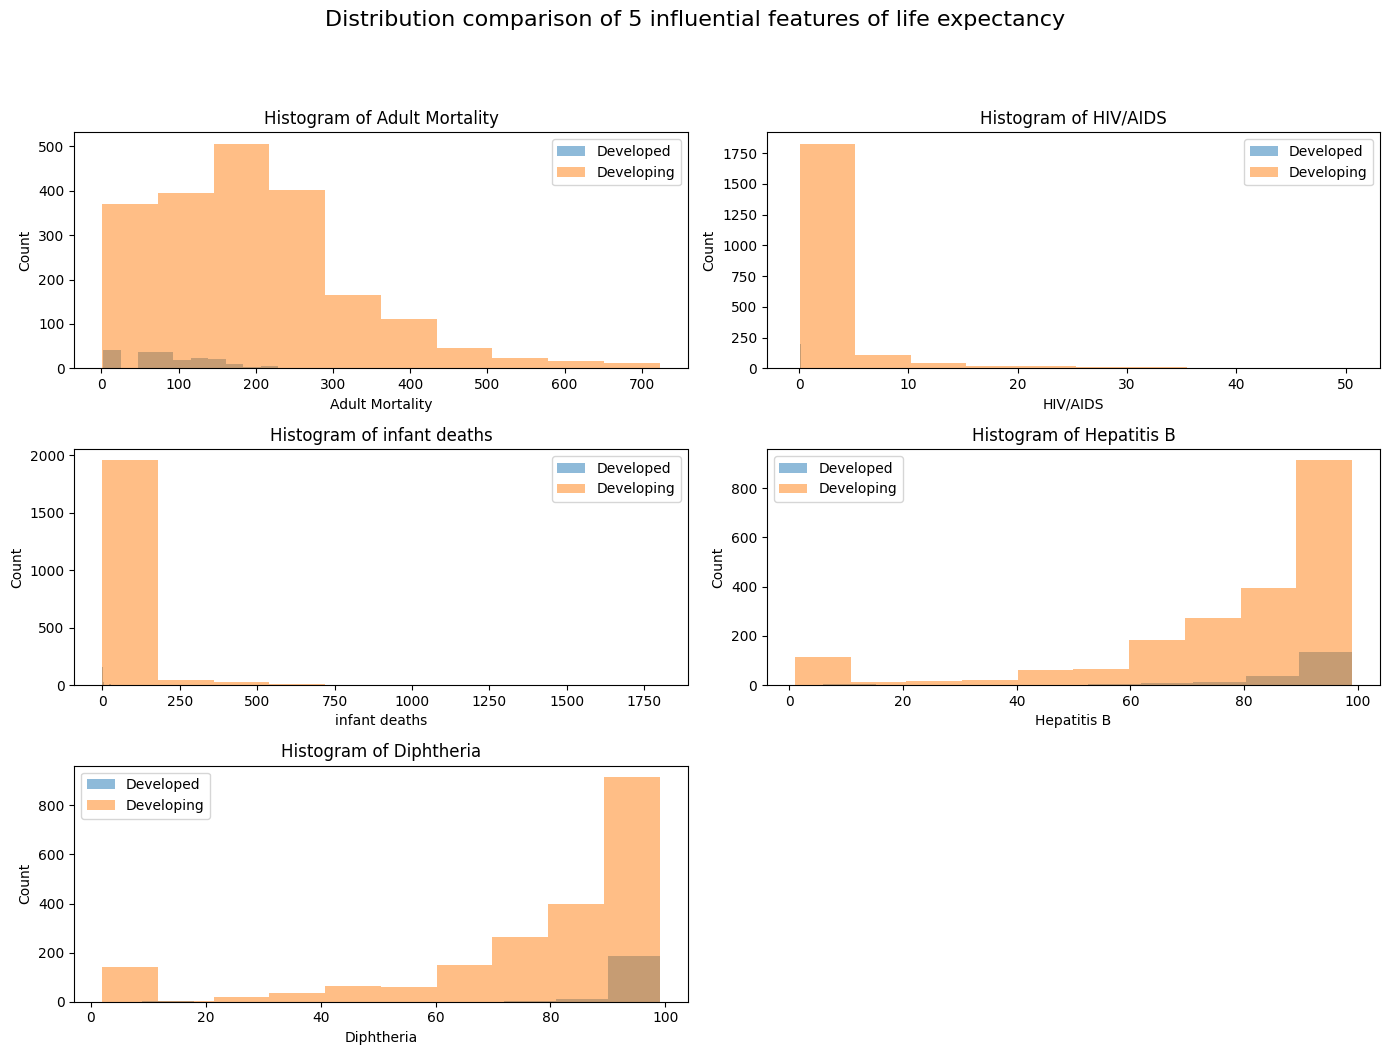

In [26]:
# Selecting 5 influential features to Life Expectancy
selected_features = [
    'Adult Mortality',
    'HIV/AIDS',
    'infant deaths',
    'Hepatitis B',
    'Diphtheria'
]

plt.figure(figsize=(14, 10))

plt.suptitle("Distribution comparison of 5 influential features of life expectancy", fontsize=16, y=1.05)

# Plot histograms for selected features
for i, feature in enumerate(selected_features, 1):
    plt.subplot(3, 2, i)

    plt.hist(df[df['Status']=="Developed"][feature].dropna(), alpha=0.5, label='Developed')
    plt.hist(df[df['Status']=="Developing"][feature].dropna(), alpha=0.5, label='Developing')

    plt.title(f"Histogram of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.legend()

plt.tight_layout()
plt.show()

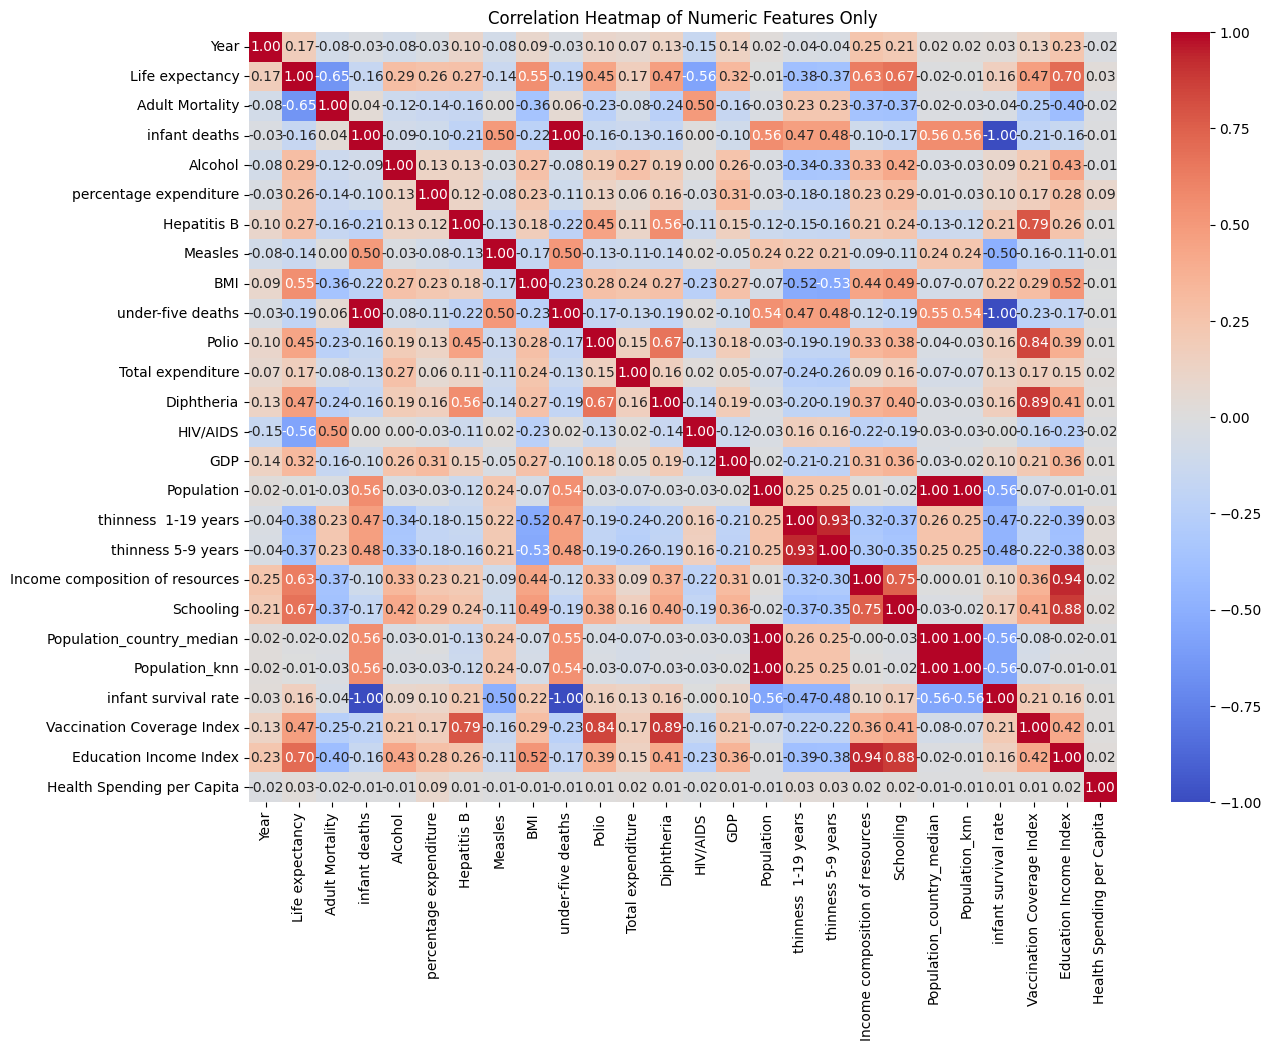

In [27]:
numeric_df = df.select_dtypes(include=['int64', 'float64']) #Select only numeric columns

# Compute correlation
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Heatmap of Numeric Features Only")
plt.show()

## Question 4

In [28]:
le = LabelEncoder()
df['Status'] = le.fit_transform(df['Status'])

df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Population_country_median,Population_knn,infant survival rate,Vaccination Coverage Index,Education Income Index,Health Spending per Capita
0,Afghanistan,2015.0,1,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,...,17.2,17.3,0.479,10.1,33736494.0,33736494.0,0.938,45.333333,4.8379,0.000002
1,Afghanistan,2014.0,1,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,...,17.5,17.5,0.476,10.0,327582.0,327582.0,0.936,60.666667,4.7600,0.000224
2,Afghanistan,2013.0,1,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,...,17.7,17.7,0.470,9.9,31731688.0,31731688.0,0.934,63.333333,4.6530,0.000002
3,Afghanistan,2012.0,1,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,...,17.9,18.0,0.463,9.8,3696958.0,3696958.0,0.931,67.000000,4.5374,0.000021
4,Afghanistan,2011.0,1,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,...,18.2,18.2,0.454,9.5,2978599.0,2978599.0,0.929,68.000000,4.3130,0.000002


In [29]:
skewed_cols = df[numeric_cols].skew()
# Filter columns with absolute skewness > 0.5
skewed_cols = skewed_cols[skewed_cols.abs() > 0.5].index

print(df[skewed_cols].skew())

Life expectancy                    -0.545702
Adult Mortality                     0.974065
infant deaths                       8.611917
Alcohol                             0.931236
percentage expenditure              1.713212
Hepatitis B                        -1.861436
Measles                             8.354071
under-five deaths                   8.356042
Polio                              -1.811507
Total expenditure                   1.004353
Diphtheria                         -1.810346
HIV/AIDS                            4.967859
GDP                                 2.062442
Population                         16.439266
thinness  1-19 years                1.565215
thinness 5-9 years                  1.646552
Income composition of resources    -1.149615
Schooling                          -0.666939
Population_country_median          16.422978
Population_knn                     16.439528
dtype: float64


In [30]:
df_transformed = df.copy()

transformed_skew = {}

for col in skewed_cols:
    data = df_transformed[col].copy()
    
    # Avoid issues with zeros/negatives
    if (data <= 0).any():
        data_shifted = data - data.min() + 1  # shift to make all positive
    else:
        data_shifted = data
    
    # Apply transformations
    sqrt_skew = np.sqrt(data_shifted).skew()
    cbrt_skew = np.cbrt(data).skew()  # cube root works with negatives
    log_skew = np.log1p(data_shifted).skew()
    
    # Store results
    transformed_skew[col] = {
        'sqrt_skew': sqrt_skew,
        'cbrt_skew': cbrt_skew,
        'log_skew': log_skew
    }

# Convert to DataFrame for easy inspection
transformed_skew_df = pd.DataFrame(transformed_skew).T
print(transformed_skew_df)

                                 sqrt_skew  cbrt_skew  log_skew
Life expectancy                  -0.686816  -0.735037 -0.828814
Adult Mortality                  -0.105238  -0.486756 -1.262101
infant deaths                     3.607501   1.437967  0.706602
Alcohol                           0.046190  -0.356827 -0.121624
percentage expenditure            0.859723   0.217507 -0.099448
Hepatitis B                      -2.479611  -2.710919 -3.130613
Measles                           3.819108   2.293568  0.565372
under-five deaths                 3.432584   1.434445  0.612303
Polio                            -2.367457  -2.567714 -2.915993
Total expenditure                 0.054699  -0.265854 -0.530427
Diphtheria                       -2.354603  -2.557942 -2.923178
HIV/AIDS                          2.538477   1.858888  1.806784
GDP                               0.773844   0.328459 -0.709255
Population                        4.682548   1.768223 -0.903714
thinness  1-19 years              0.4676

In [31]:
best_transform = transformed_skew_df.apply(lambda x: x.abs().idxmin(), axis=1) #Get best transformation for each column
print(best_transform)

Life expectancy                    sqrt_skew
Adult Mortality                    sqrt_skew
infant deaths                       log_skew
Alcohol                            sqrt_skew
percentage expenditure              log_skew
Hepatitis B                        sqrt_skew
Measles                             log_skew
under-five deaths                   log_skew
Polio                              sqrt_skew
Total expenditure                  sqrt_skew
Diphtheria                         sqrt_skew
HIV/AIDS                            log_skew
GDP                                cbrt_skew
Population                          log_skew
thinness  1-19 years                log_skew
thinness 5-9 years                  log_skew
Income composition of resources    sqrt_skew
Schooling                          sqrt_skew
Population_country_median           log_skew
Population_knn                      log_skew
dtype: object


In [32]:
best_transform_dict = best_transform.to_dict() #Convert the best transformations for each column to dictionary for easy access
df_transformed = df.copy()

# Apply the best transformations
for col, transform_str in best_transform_dict.items():
    if col not in df_transformed.columns:
        continue
    
    # Remove '_skew' to get the actual method: 'sqrt', 'cbrt', or 'log'
    transform = transform_str.replace('_skew', '')
    
    data = df_transformed[col].copy()
    
    # Shift data if needed for sqrt or log
    if transform in ['sqrt', 'log'] and (data <= 0).any():
        data = data - data.min() + 1
    
    # Apply transformation
    if transform == 'sqrt':
        df_transformed[col] = np.sqrt(data)
    elif transform == 'cbrt':
        df_transformed[col] = np.cbrt(data)
    elif transform == 'log':
        df_transformed[col] = np.log1p(data)

df_transformed[skewed_cols].skew()

Life expectancy                   -0.686816
Adult Mortality                   -0.105238
infant deaths                      0.706602
Alcohol                            0.046190
percentage expenditure            -0.099448
Hepatitis B                       -2.479611
Measles                            0.565372
under-five deaths                  0.612303
Polio                             -2.367457
Total expenditure                  0.054699
Diphtheria                        -2.354603
HIV/AIDS                           1.806784
GDP                                0.328459
Population                        -0.903714
thinness  1-19 years              -0.049545
thinness 5-9 years                -0.070558
Income composition of resources   -1.389728
Schooling                         -1.618485
Population_country_median         -0.865863
Population_knn                    -0.903887
dtype: float64

In [33]:
df_transformed = df_transformed.drop(columns=['Country']) #Drop Country column as it's not needed for modeling

In [34]:
scaler = StandardScaler() #Create StandardScaler instance
df_scaled = scaler.fit_transform(df_transformed) #Fit and transform the data

# Convert back to DataFrame for convenience
df_scaled = pd.DataFrame(df_scaled, columns=df_transformed.columns)
df_scaled.describe().round(3)

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Population_country_median,Population_knn,infant survival rate,Vaccination Coverage Index,Education Income Index,Health Spending per Capita
count,2250.000,2250.000,2250.000,2250.000,2250.000,2250.000,2250.000,2250.000,2250.000,2250.000,...,2250.000,2250.000,2250.000,2250.000,2250.000,2250.000,2250.000,2250.000,2250.000,2250.000
mean,-0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,...,0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-1.556,-3.202,-3.717,-2.331,-1.131,-1.543,-1.344,-4.466,-1.017,-1.758,...,-2.233,-2.220,-3.078,-5.037,-4.476,-4.313,-13.189,-3.582,-1.948,-0.046
25%,-0.914,0.312,-0.735,-0.582,-0.855,-0.869,-1.344,-0.121,-1.017,-0.873,...,-0.787,-0.739,-0.517,-0.429,-0.517,-0.587,0.072,-0.580,-0.753,-0.046
50%,-0.057,0.312,0.210,0.046,-0.187,0.032,0.162,0.359,-0.210,-0.077,...,-0.023,0.001,0.214,0.178,0.351,0.233,0.244,0.367,0.032,-0.046
75%,0.799,0.312,0.758,0.669,0.736,0.764,0.890,0.599,0.809,0.913,...,0.764,0.753,0.691,0.618,0.466,0.742,0.282,0.782,0.703,-0.045
max,1.655,0.312,2.228,2.847,3.503,2.438,1.621,0.686,2.678,2.700,...,2.467,2.488,1.740,2.422,2.832,2.565,0.289,0.946,3.299,42.652


## Question 5

In [ ]:
X = df_transformed.drop(columns=['Life expectancy']) #Input features
y = df_transformed['Life expectancy'] #Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #Split data into training and testing sets

X_train_scaled = scaler.fit_transform(X_train) #Scale training data to avoid information leak
X_test_scaled = scaler.transform(X_test) #Scale testing data using the same scaler

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)


,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Population_country_median,Population_knn,infant survival rate,Vaccination Coverage Index,Education Income Index,Health Spending per Capita
0,1.448831,0.315551,0.290304,0.792009,-1.559890,0.291677,-0.523559,1.055716,1.224105,0.732973,...,0.277370,0.224292,0.426782,-0.229548,-2.540573,-2.493078,0.055570,-0.778999,-0.060823,-0.014363
1,-1.571565,0.315551,1.532362,0.023766,-0.169639,-1.347056,-1.371979,1.133067,-0.818983,0.140733,...,1.011383,0.956713,-0.414744,-0.321742,0.418908,0.741487,0.217891,-2.246035,-0.593071,-0.046753
2,1.664574,0.315551,-0.060808,-0.193033,0.394405,-1.347056,0.132885,-1.019873,1.244952,-0.221391,...,-0.271439,-0.307400,0.711679,0.658454,0.000880,-0.097305,0.239064,0.223531,0.743799,-0.046753
3,1.233089,0.315551,0.844213,-0.664919,-1.559890,-1.114240,0.568259,-0.890229,0.093110,-0.731777,...,0.620637,0.556143,0.593586,0.494792,-0.825910,-0.876702,0.267294,0.774922,0.531889,-0.046739
4,-0.708595,0.315551,0.161324,-1.136804,0.647434,-1.347056,0.686653,-1.019873,0.457947,-1.168032,...,-0.113376,-0.147156,0.574611,0.658454,0.418908,0.741487,0.281409,0.958719,0.635031,-0.046753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,1.017346,0.315551,0.056503,-1.136804,1.394524,-1.347056,0.598088,-1.019873,1.437795,-1.168032,...,-0.567231,-0.567148,1.042454,0.494792,0.418908,0.741487,0.281409,0.891884,0.875583,-0.046753
446,1.233089,0.315551,-0.305354,-0.860769,0.269691,1.246906,0.568259,-0.446975,0.953083,-0.912839,...,-0.741616,-0.740047,0.796174,0.522316,-0.697134,-0.755308,0.274351,0.774922,0.706748,-0.044189
447,-1.571565,0.315551,-1.185606,0.951885,-1.163618,-0.054461,0.100396,1.372102,-1.100428,1.121404,...,1.261915,1.234963,-3.121967,-2.149858,0.712671,0.573685,-0.007947,-2.015453,-1.949150,-0.046746
448,1.664574,0.315551,-0.109347,-1.136804,0.589690,-1.347056,0.627762,-1.019873,-0.089309,-1.168032,...,0.602563,0.574526,0.996269,1.180395,-1.044937,-1.083174,0.281409,0.875175,1.415275,-0.046753


In [63]:
dt_regressor = DecisionTreeRegressor(max_depth=11, random_state=42) #Create Decision Tree Regressor instance
dt_regressor.fit(X_train_scaled, y_train) #Fit the model

,criterion,'squared_error'
,splitter,'best'
,max_depth,11
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [64]:
dt_regressor.score(X_test_scaled, y_test) #Evaluate the model on the test set

0.9164031741686662

In [65]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42) #Create Random Forest Regressor instance
rf_regressor.fit(X_train_scaled, y_train) #Fit the model

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [39]:
rf_regressor.score(X_test_scaled, y_test) #Evaluate the model on the test set

0.9533741550780306

In [40]:
knn_regressor = KNeighborsRegressor(n_neighbors=3, weights='uniform') #Create KNN Regressor instance
knn_regressor.fit(X_train_scaled, y_train) #Fit the model

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [41]:
knn_regressor.score(X_test_scaled, y_test) #Evaluate the model on the test set

0.8903202588637084

In [42]:
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42) #Create Gradient Boosting Regressor instance
gbr.fit(X_train_scaled, y_train) #Fit the model

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [43]:
gbr.score(X_test_scaled, y_test) #Evaluate the model on the test set

0.936919524422611

In [44]:
model_params = {
    'decision_tree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'max_depth': [5, 10, 20],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'random_forest': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [5, 10, 20]
        }
    },
    'knn': {
        'model': KNeighborsRegressor(),
        'params': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance'],
        }
    },
    'gradient_boosting': {
        'model': GradientBoostingRegressor(),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.05, 0.1],
            'max_depth': [2, 3, 5]
        }
    }
}

In [49]:
scores = []
gradient_boosting = None

for model_name, mp in model_params.items():
    # Create GridSearchCV instance
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train_scaled, y_train) #Fit the model
    # Best estimator
    best_model = clf.best_estimator_
    
    # Predict on test set
    y_pred = best_model.predict(X_test_scaled)

    # Compute metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    scores.append({
        'model': model_name,
        'best_params': clf.best_params_,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2,
    })
    
    if model_name == "gradient_boosting":
        gradient_boosting = best_model
    

In [81]:
gridsearch_df = pd.DataFrame(scores) #Convert scores to DataFrame
gridsearch_df

,model,best_params,RMSE,MAE,R2
0,decision_tree,"{'max_depth': 20, 'min_samples_leaf': 4}",0.157712,0.102333,0.917764
1,random_forest,"{'max_depth': 20, 'n_estimators': 100}",0.116718,0.074988,0.954959
2,knn,"{'n_neighbors': 5, 'weights': 'distance'}",0.177148,0.122820,0.896246
3,gradient_boosting,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.115827,0.078391,0.955644


## Question 6

In [ ]:
gradient_boosting.fit(X_train_scaled, y_train) # Gradient boosting is the most important feature

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,200
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,5
,min_impurity_decrease,0.0
,init,None


In [66]:
explainer = shap.Explainer(gradient_boosting, X_train_scaled) #Create SHAP Explainer
shap_values = explainer(X_test_scaled)

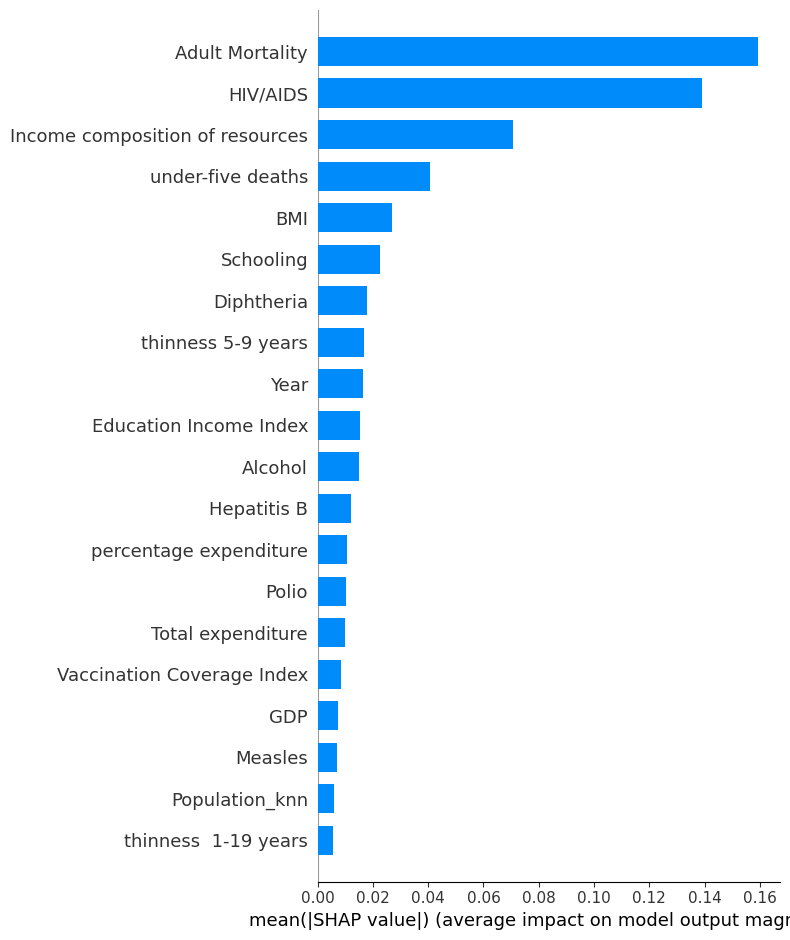

In [67]:
shap.summary_plot(shap_values, X_test_scaled, plot_type="bar") # Plot a summary plot to visualize the most important features

In [70]:
gradient_boosting.feature_importances_

array([0.00977527, 0.00195684, 0.21314344, 0.00257967, 0.00907129,
       0.00401616, 0.00068936, 0.00137036, 0.01712537, 0.02267773,
       0.00458014, 0.00501159, 0.00450288, 0.5878548 , 0.00181273,
       0.00059379, 0.00339351, 0.0084659 , 0.06626979, 0.01335128,
       0.00086553, 0.00084462, 0.00185082, 0.00157784, 0.01534843,
       0.00127088])

In [71]:
gb_importances = pd.DataFrame({
    "feature": X_train_scaled.columns,
    "gb_importance": gradient_boosting.feature_importances_
})

shap_importances = pd.DataFrame({
    "feature": X_train_scaled.columns,
    "shap_importance": np.mean(np.abs(shap_values.values), axis=0)
})

comparison = gb_importances.merge(shap_importances, on="feature")
comparison = comparison.sort_values("shap_importance", ascending=False)
comparison

,feature,gb_importance,shap_importance
2,Adult Mortality,0.213143,0.159360
13,HIV/AIDS,0.587855,0.139271
18,Income composition of resources,0.066270,0.070727
9,under-five deaths,0.022678,0.040593
8,BMI,0.017125,0.026949
19,Schooling,0.013351,0.022642
12,Diphtheria,0.004503,0.017974
17,thinness 5-9 years,0.008466,0.016656
0,Year,0.009775,0.016272
24,Education Income Index,0.015348,0.015430


In [72]:
important_features = ['Adult Mortality', 'HIV/AIDS', 'Income composition of resources','under-five deaths', 'BMI','Schooling', 'Diphtheria','thinness 5-9 years']

X_train_scaled = X_train_scaled[important_features]
X_test_scaled = X_test_scaled[important_features]

X_test_scaled

,Adult Mortality,HIV/AIDS,Income composition of resources,under-five deaths,BMI,Schooling,Diphtheria,thinness 5-9 years
0,0.290304,-0.630136,0.426782,0.732973,1.224105,-0.229548,-0.412703,0.224292
1,1.532362,1.880254,-0.414744,0.140733,-0.818983,-0.321742,-1.653332,0.956713
2,-0.060808,-0.428461,0.711679,-0.221391,1.244952,0.658454,0.258121,-0.307400
3,0.844213,0.866472,0.593586,-0.731777,0.093110,0.494792,0.548141,0.556143
4,0.161324,-0.338995,0.574611,-1.168032,0.457947,0.658454,0.659847,-0.147156
...,...,...,...,...,...,...,...,...
445,0.056503,-0.525092,1.042454,-1.168032,1.437795,0.494792,0.632135,-0.567148
446,-0.305354,-0.630136,0.796174,-0.912839,0.953083,0.522316,0.548141,-0.740047
447,-1.185606,1.334599,-3.121967,1.121404,-1.100428,-2.149858,-1.512826,1.234963
448,-0.109347,-0.630136,0.996269,-1.168032,-0.089309,1.180395,0.604282,0.574526


In [73]:
gradient_boosting.fit(X_train_scaled, y_train)


,loss,'squared_error'
,learning_rate,0.1
,n_estimators,200
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,5
,min_impurity_decrease,0.0
,init,None


In [85]:
y_pred = gradient_boosting.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

evaluation = []
evaluation.append({
    'Type': 'Full Features',
    'RMSE': gridsearch_df[gridsearch_df['model'] == 'gradient_boosting']['RMSE'].values[0],
    'MAE': gridsearch_df[gridsearch_df['model'] == 'gradient_boosting']['MAE'].values[0],
    'R2': gridsearch_df[gridsearch_df['model'] == 'gradient_boosting']['R2'].values[0],
})
evaluation.append({
    'Type': 'Reduced Features',
    'RMSE': rmse,
    'MAE': mae,
    'R2': r2,
})

evaluation_df = pd.DataFrame(evaluation)
evaluation_df

,Type,RMSE,MAE,R2
0,Full Features,0.115827,0.078391,0.955644
1,Reduced Features,0.122745,0.084018,0.950188
